# Check neural netwok implementation in CAM

See if inputs, activations and outputs are correct!

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
%matplotlib inline
from cbrain.imports import *
from cbrain.utils import get2Didxs
from matplotlib.animation import FuncAnimation
from IPython.display import SVG, HTML
from cbrain.models import fc_model

In [19]:
DATA_DIR = '/scratch/05488/tg847872/nnatmonly_fbp8_D008_andkua_allfix/'
KERAS_DIR = '/home1/05488/tg847872/saved_models/'

In [20]:
def normalize(x, m, s):
    return (x - m[:, None, None]) / s[:, None, None]

In [21]:
def get_cb_inps(ds, t, m, s):
    x = np.concatenate(
        [ds['NNTBP'][t], ds['NNQBP'][t], ds['NNVBP'][t], np.expand_dims(ds['NNPS'][t], 0),
         np.expand_dims(ds['NNSOLIN'][t], 0), np.expand_dims(ds['NNSHF'][t], 0), np.expand_dims(ds['NNLHF'][t], 0)]
    )
    return normalize(x, m, s)

In [22]:
def stack_outps(ds, t, s='NN'):
    x = np.concatenate(
        [ds[f'{s}DT'].isel(time=t)*C_P, ds[f'{s}DQ'].isel(time=t)*L_S,
         np.expand_dims(ds[f'{s}FSNT'][t], 0)*1e-3, np.expand_dims(ds[f'{s}FSNS'][t], 0)*-1e-3,
         np.expand_dims(ds[f'{s}FLNT'][t], 0)*-1e-3, np.expand_dims(ds[f'{s}FLNS'][t], 0)*1e-3,
         np.expand_dims(ds[f'{s}PRECT'][t], 0)*(1e3*24*3600*2e-2)])
    return x

In [89]:
ds = xr.open_mfdataset(f'{DATA_DIR}*D008*.h1*', decode_times=False)

In [42]:
hyai, hybi = ds.hyai.values, ds.hybi.values

In [24]:
m = keras.models.load_model(f'{KERAS_DIR}/D008_fbp_engy_ess_sample1_max_rs_deep_eq.h5')

In [25]:
mean = np.loadtxt(f'{KERAS_DIR}/D008_fbp_engy_ess_sample1_max_rs_deep_eq/inp_means.txt', delimiter=',')
std = np.loadtxt(f'{KERAS_DIR}/D008_fbp_engy_ess_sample1_max_rs_deep_eq/inp_max_rs.txt', delimiter=',')

D008: 9.365594e+01,8.567189e+01,8.774968e+01,7.018541e+01,6.528622e+01,5.932625e+01,6.942665e+01,6.029158e+01,5.197958e+01,5.409972e+01,4.937241e+01,4.593552e+01,4.393788e+01,4.259604e+01,4.672720e+01,5.262744e+01,5.455800e+01,5.189064e+01,4.932770e+01,4.664037e+01,4.465698e+01,4.215993e+01,4.067966e+01,3.868890e+01,3.833572e+01,3.714224e+01,3.648871e+01,3.414896e+01,3.423016e+01,3.682788e+01,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.830832e-03,3.111241e-03,4.741869e-03,6.551212e-03,8.860402e-03,1.139849e-02,1.397843e-02,1.603283e-02,1.787817e-02,1.878771e-02,1.951828e-02,2.037979e-02,2.092847e-02,2.106410e-02,2.246404e-02,2.371883e-02,2.949526e+02,2.079397e+02,1.628912e+02,1.397835e+02,1.135719e+02,9.827497e+01,9.557080e+01,1.025137e+02,1.149606e+02,1.356386e+02,1.614821e+02,1.814163e+02,1.885419e+02,1.872636e+02,1.839919e+02,1.697410e+02,1.539299e+02,1.384422e+02,1.143172e+02,9.415852e+01,8.480597e+01,8.630643e+01,9.804558e+01,1.026720e+02,1.027524e+02,9.779700e+01,8.910417e+01,8.332742e+01,7.859640e+01,7.235646e+01,1.454460e+04,1.410644e+03,3.754022e+02,1.021105e+03
D003: 9.201454e+01,8.540952e+01,8.751765e+01,6.616690e+01,6.138937e+01,5.401346e+01,6.141039e+01,5.588878e+01,4.747055e+01,4.423218e+01,4.583290e+01,4.362819e+01,4.176633e+01,4.259604e+01,4.635732e+01,5.210983e+01,5.197246e+01,5.043509e+01,4.791882e+01,4.545575e+01,4.461772e+01,4.190228e+01,3.807355e+01,3.718414e+01,3.650159e+01,3.524353e+01,3.433463e+01,3.217490e+01,3.337033e+01,3.596121e+01,1.704260e-03,1.704260e-03,1.704260e-03,1.704260e-03,1.704260e-03,1.704260e-03,1.704260e-03,1.704260e-03,1.704260e-03,1.704260e-03,1.704260e-03,1.704260e-03,1.704260e-03,1.704260e-03,1.704260e-03,2.596640e-03,4.257566e-03,6.238114e-03,8.384271e-03,1.075177e-02,1.307430e-02,1.525352e-02,1.691570e-02,1.813632e-02,1.891409e-02,1.948163e-02,1.974640e-02,2.039480e-02,2.127217e-02,2.358112e-02,2.729529e+02,1.859719e+02,1.506529e+02,1.253509e+02,1.018693e+02,9.197374e+01,9.020462e+01,9.194344e+01,1.089900e+02,1.255724e+02,1.423872e+02,1.673501e+02,1.768660e+02,1.801133e+02,1.775844e+02,1.646340e+02,1.461416e+02,1.244649e+02,1.070747e+02,8.881345e+01,7.471648e+01,8.244339e+01,9.166109e+01,9.338657e+01,9.360108e+01,9.198415e+01,8.666759e+01,8.170960e+01,7.674472e+01,6.991130e+01,1.453821e+04,1.410644e+03,3.525914e+02,8.446584e+02
D004:
9.365594e+01,8.567189e+01,8.774968e+01,7.018541e+01,6.528622e+01,5.932625e+01,6.942665e+01,6.029158e+01,5.197958e+01,5.409972e+01,4.937241e+01,4.593552e+01,4.393788e+01,4.259604e+01,4.672720e+01,5.262744e+01,5.455800e+01,5.189064e+01,4.932770e+01,4.664037e+01,4.465698e+01,4.215993e+01,4.067966e+01,3.868890e+01,3.833572e+01,3.714224e+01,3.648871e+01,3.414896e+01,3.423016e+01,3.682788e+01,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.704066e-03,1.830832e-03,3.111241e-03,4.741869e-03,6.551212e-03,8.860402e-03,1.139849e-02,1.397843e-02,1.603283e-02,1.787817e-02,1.878771e-02,1.951828e-02,2.037979e-02,2.092847e-02,2.106410e-02,2.246404e-02,2.371883e-02,2.949526e+02,2.079397e+02,1.628912e+02,1.397835e+02,1.135719e+02,9.827497e+01,9.557080e+01,1.025137e+02,1.149606e+02,1.356386e+02,1.614821e+02,1.814163e+02,1.885419e+02,1.872636e+02,1.839919e+02,1.697410e+02,1.539299e+02,1.384422e+02,1.143172e+02,9.415852e+01,8.480597e+01,8.630643e+01,9.804558e+01,1.026720e+02,1.027524e+02,9.779700e+01,8.910417e+01,8.332742e+01,7.859640e+01,7.235646e+01,1.454460e+04,1.410644e+03,3.754022e+02,1.021105e+03

## Inputs: Check!

In [26]:
inps = get_cb_inps(ds, 1, mean, std); inps.shape

(94, 64, 128)

In [27]:
inps[:, 0, 0]

array([ 2.36275857e-01,  1.66952748e-01,  1.68496906e-01,  2.72146845e-01,
        2.37577972e-01,  3.06474200e-01,  3.19523027e-01,  3.75597136e-01,
        4.03956130e-01,  3.44028266e-01,  3.20534138e-01,  2.53701957e-01,
        1.65911783e-01,  1.32336847e-02, -1.28057718e-01, -2.18004434e-01,
       -2.55411267e-01, -2.89331821e-01, -2.93665343e-01, -2.78650618e-01,
       -2.78456190e-01, -2.88314561e-01, -2.73907045e-01, -2.76591108e-01,
       -2.83569346e-01, -2.89858462e-01, -2.89743012e-01, -3.04915889e-01,
       -2.97477192e-01, -2.73976758e-01,  2.27334995e-04,  2.39166584e-04,
        3.12979775e-04,  2.64643552e-04,  2.77323212e-04,  2.46403776e-04,
        2.03245080e-04,  1.67259464e-04,  7.31982043e-05, -2.18651199e-04,
       -1.19871648e-03, -4.07418579e-03, -1.05577293e-02, -2.29530260e-02,
       -4.34802622e-02, -4.80635058e-02, -5.65371480e-02, -7.03926015e-02,
       -7.79327205e-02, -8.83963972e-02, -1.10977846e-01, -1.55290458e-01,
       -1.94499034e-01, -

## FC Layer outputs: Check!

In [28]:
nnoutps = stack_outps(ds, 1, 'NN'); nnoutps.shape

(65, 64, 128)

In [29]:
nnoutps[:, 0, 0]

array([-3.72038479e-03, -3.97938816e-03, -2.96139671e-03,  1.47595609e-04,
       -1.98610825e-03, -5.10886253e-04,  5.08862686e-05, -2.44184572e-04,
       -9.28749272e-04, -8.24408897e-04, -3.84751562e-04, -6.28059672e-04,
        4.64504177e-04, -2.62304238e-04, -1.25411141e-03, -4.46220441e-03,
       -7.07157748e-03, -8.85006972e-03, -8.59614741e-03, -7.75259128e-03,
       -6.73990184e-03, -6.78041531e-03, -7.05054170e-03, -8.37322697e-03,
        4.48776828e-03,  7.27734389e-03,  6.46168785e-03,  9.64592327e-04,
       -1.00982692e-02, -2.71332171e-02, -1.29496575e-05, -5.75269996e-06,
       -1.04280571e-06,  1.42895158e-06, -1.84903433e-06, -3.66437666e-06,
       -3.95237566e-06,  8.77828427e-07, -3.01988075e-06,  1.22479230e-06,
        8.61550870e-06,  1.14643444e-05, -5.44520190e-05, -1.27920910e-04,
       -2.22946037e-04, -9.43296182e-05,  8.88163049e-04,  1.11412106e-03,
        1.19302783e-03, -4.64813551e-04,  9.67312430e-04, -4.41894354e-03,
        2.90961284e-03,  

In [31]:
mcut = fc_model(94, 65, 9*[256], 0.1, 'mse', 'LeakyReLU')

In [32]:
mcut.set_weights(m.get_weights())

In [33]:
nnpreds = mcut.predict(inps.reshape(94, -1).T).T.reshape(65, 64, 128); nnpreds.shape

(65, 64, 128)

In [34]:
nnpreds[:, 0, 0]

array([-3.7204321e-03, -3.9794375e-03, -2.9614419e-03,  1.4758483e-04,
       -1.9861227e-03, -5.1089079e-04,  5.0880481e-05, -2.4419534e-04,
       -9.2874921e-04, -8.2439207e-04, -3.8474519e-04, -6.2805973e-04,
        4.6452601e-04, -2.6230514e-04, -1.2541017e-03, -4.4622067e-03,
       -7.0715630e-03, -8.8500502e-03, -8.5961185e-03, -7.7525452e-03,
       -6.7398925e-03, -6.7804172e-03, -7.0505962e-03, -8.3728703e-03,
        4.4876738e-03,  7.2771129e-03,  6.4612180e-03,  9.6429128e-04,
       -1.0098348e-02, -2.7132541e-02, -1.2949444e-05, -5.7525467e-06,
       -1.0428557e-06,  1.4286779e-06, -1.8495193e-06, -3.6646234e-06,
       -3.9527367e-06,  8.7750959e-07, -3.0203664e-06,  1.2243836e-06,
        8.6136133e-06,  1.1459575e-05, -5.4459088e-05, -1.2793229e-04,
       -2.2294465e-04, -9.4319694e-05,  8.8813249e-04,  1.1141021e-03,
        1.1930200e-03, -4.6481215e-04,  9.6722320e-04, -4.4189272e-03,
        2.9098205e-03,  1.8045716e-02,  9.7165728e-04,  7.9603037e-03,
      

## Post-processing: Check!

In [35]:
ppoutps = stack_outps(ds, 1, 'PP'); ppoutps.shape

(65, 64, 128)

In [36]:
ppoutps[: , 0, 0]

array([-3.3923781e-03, -3.6285466e-03, -2.7003060e-03,  1.6060832e-04,
       -1.8110035e-03, -4.6584412e-04,  5.5372639e-05, -2.2265610e-04,
       -8.4686634e-04, -7.5172511e-04, -3.5083006e-04, -5.7268701e-04,
        5.0545705e-04, -2.3917828e-04, -1.1435430e-03, -4.0687951e-03,
       -6.4481143e-03, -8.0698067e-03, -7.8382706e-03, -7.0690867e-03,
       -6.1456803e-03, -6.1826217e-03, -6.4289328e-03, -7.6350044e-03,
        4.8834309e-03,  7.9189483e-03,  7.0313811e-03,  1.0496353e-03,
       -9.2079584e-03, -2.4741026e-02, -1.3242535e-05, -5.8828068e-06,
       -1.0663905e-06,  1.3966335e-06, -1.8908534e-06, -3.7472528e-06,
       -4.0417649e-06,  8.5797490e-07, -3.0881806e-06,  1.1970915e-06,
        8.4206540e-06,  1.1205058e-05, -5.5683544e-05, -1.3081406e-04,
       -2.2798832e-04, -9.6463045e-05,  8.6807570e-04,  1.0889233e-03,
        1.1660454e-03, -4.7532609e-04,  9.4543502e-04, -4.5188852e-03,
        2.8438072e-03,  1.7637873e-02,  9.5014746e-04,  7.7815619e-03,
      

In [37]:
pppreds = m.predict(inps.reshape(94, -1).T).T.reshape(65, 64, 128); pppreds.shape

(65, 64, 128)

In [38]:
pppreds[:, 0, 0]

array([-3.39242071e-03, -3.62859084e-03, -2.70034675e-03,  1.60596624e-04,
       -1.81101647e-03, -4.65848163e-04,  5.53663522e-05, -2.22665883e-04,
       -8.46866169e-04, -7.51709682e-04, -3.50824179e-04, -5.72686899e-04,
        5.05480915e-04, -2.39179048e-04, -1.14353397e-03, -4.06879699e-03,
       -6.44809939e-03, -8.06978624e-03, -7.83824269e-03, -7.06904288e-03,
       -6.14567054e-03, -6.18262263e-03, -6.42898120e-03, -7.63467699e-03,
        4.88332892e-03,  7.91869871e-03,  7.03087077e-03,  1.04930787e-03,
       -9.20802914e-03, -2.47404035e-02, -1.32422965e-05, -5.88264083e-06,
       -1.06643995e-06,  1.39636825e-06, -1.89134630e-06, -3.74749902e-06,
       -4.04212824e-06,  8.57664645e-07, -3.08867220e-06,  1.19669403e-06,
        8.41881592e-06,  1.12004154e-05, -5.56906853e-05, -1.30825487e-04,
       -2.27986573e-04, -9.64527426e-05,  8.68047297e-04,  1.08890655e-03,
        1.16603973e-03, -4.75323934e-04,  9.45349340e-04, -4.51886188e-03,
        2.84401467e-03,  

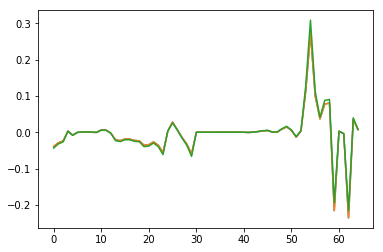

In [40]:
plt.plot(ppoutps[:, 30, 0]); plt.plot(pppreds[:, 30, 0]); plt.plot(nnpreds[:, 30, 0])

## Is energy conserved? Check!

In [66]:
def get_dQ(x, y):
    PS = x[:, 90] * std[90] + mean[90]
    P = P0 * hyai + PS[:, None] * hybi
    dP = P[:, 1:] - P[:, :-1]
    #pdb.set_trace()
    vintPHQ = np.sum(y[:, 30:60]*dP/G, 1) / L_S
    dQCONV = vintPHQ
    LHFLX = x[:, 93] * std[93] + mean[93]
    dQSRF = LHFLX / L_V
    dQPREC = y[:, 64] / (24*3600*2e-2)  # TOT_PRECL
    dQ = dQCONV - dQSRF + dQPREC
    return dQCONV, dQSRF - dQPREC, dQ

In [67]:
def get_dE(x, y):
    PS = x[:, 90] * std[90] + mean[90]
    P = P0 * hyai + PS[:, None] * hybi
    dP = P[:, 1:] - P[:, :-1]
    vintTPHY = np.sum(y[:, :30]*dP/G, 1)
    vintPHQ = np.sum(y[:, 30:60]*dP/G, 1)/L_S*L_V
    dRADFLX = np.sum(y[:, -5:-1], 1) * 1e3
    SHFLX = x[:, 92] * std[92] + mean[92]
    LHFLX = x[:, 93] * std[93] + mean[93]
    dSRFFLX = SHFLX + LHFLX
    dSE = vintTPHY - SHFLX - dRADFLX
    dME = -(vintPHQ - LHFLX)
    dE = dSE - dME
    return dSE, dME, dE

In [68]:
def plot_EQ(inps, outps):
    Qa, Qb, dQ = get_dQ(inps.reshape(94, -1).T, outps.reshape(65, -1).T)
    Ea, Eb, dE = get_dE(inps.reshape(94, -1).T, outps.reshape(65, -1).T)
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    axes[0].scatter(Qa, Qb)
    axes[0].set_title(f'mean(dQ) = {np.abs(Qa-Qb).mean()}') 
    axes[0].set_xlim(-4e-3, 1e-3); axes[0].set_ylim(-4e-3, 1e-3);
    axes[1].scatter(Ea, Eb)
    axes[1].set_title(f'mean(dE) = {np.abs(Ea-Eb).mean()}')

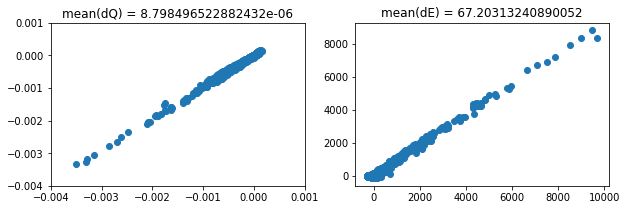

In [69]:
plot_EQ(inps, nnoutps)

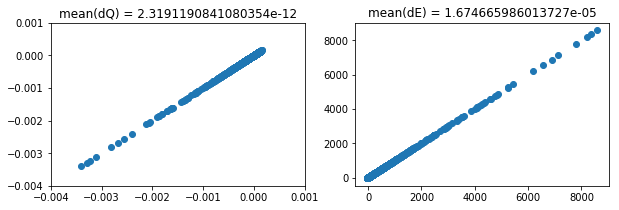

In [70]:
plot_EQ(inps, ppoutps)

## Why does D008 crash and D004 does not?

In [196]:
d4 = xr.open_mfdataset(f'{DATA_DIR}*D004*.h1*', decode_times=False)
d9 = xr.open_mfdataset(f'{DATA_DIR}*D009*.h1*', decode_times=False)

In [187]:
dref = xr.open_mfdataset(
    f'/scratch/05488/tg847872/fluxbypass_aqua/AndKua_aqua_SPCAM3.0_sp_fbp_f4.cam2.h1.0000-01-*1-00000.nc', 
    decode_times=False)

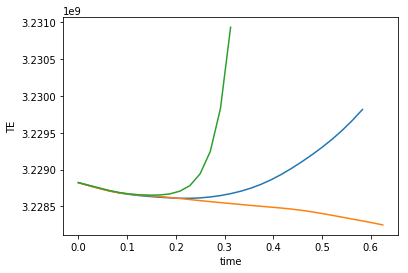

In [197]:
ds.TE.isel(time=slice(0, -2)).mean(('lat', 'lon')).plot();
d4.TE.isel(time=slice(0, -2)).mean(('lat', 'lon')).plot();
d9.TE.isel(time=slice(0, -2)).mean(('lat', 'lon')).plot();

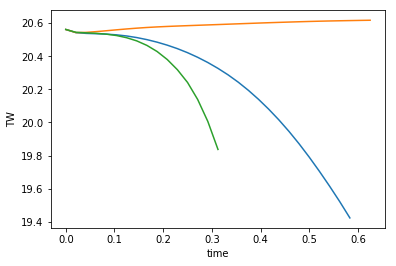

In [198]:
ds.TW.isel(time=slice(0, -2)).mean(('lat', 'lon')).plot();
d4.TW.isel(time=slice(0, -2)).mean(('lat', 'lon')).plot();
d9.TW.isel(time=slice(0, -2)).mean(('lat', 'lon')).plot();

In [219]:
def comp(func, var, **kwargs):
    fig, axs = plt.subplots(1, 3, figsize=(13, 4))
    [func(d[var]).plot(ax=ax, **kwargs) for d, ax in zip([d4, d9], axs.flat)]
    (func(d4[var])-func(d9[var])).plot(ax=axs[-1], **kwargs)

In [199]:
def comp_ref(func, var, ref_var=None, **kwargs):
    fig, axs = plt.subplots(1, 4, figsize=(13, 4))
    [func(d[var]).plot(ax=ax, **kwargs) for d, ax in zip([ds, d4, d9], axs.flat)]
    func(dref[var if ref_var is None else ref_var]).plot(ax=axs[-1], **kwargs)
    #(func(ds)-func(d4)).plot(ax=axs[-1])

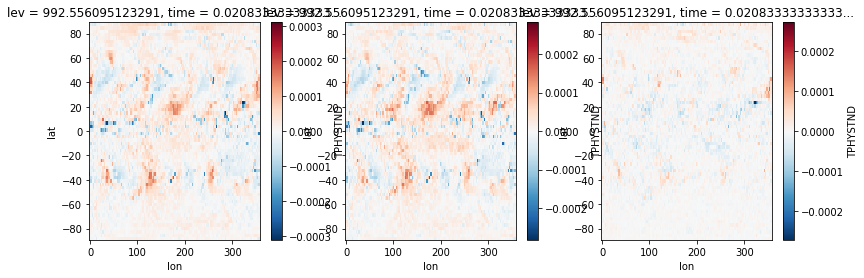

In [227]:
comp(lambda d: d.isel(time=1, lev=-1), 'TPHYSTND')

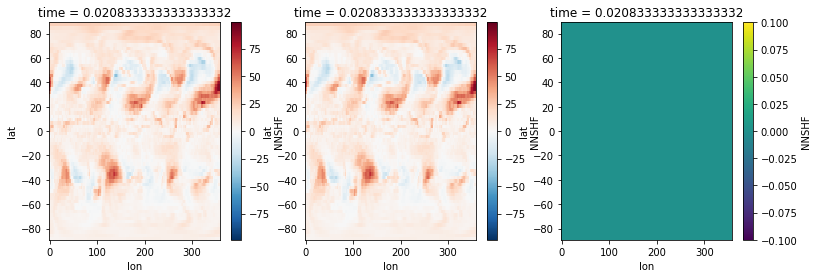

In [228]:
comp(lambda d: d.isel(time=1), 'NNSHF')

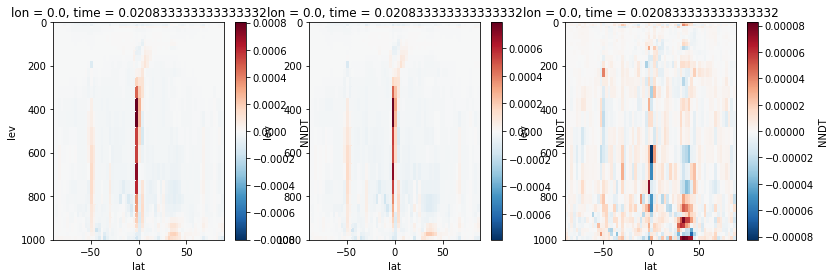

In [226]:
comp(lambda d: d.isel(time=1, lon=0), 'NNDT', yincrease=False)

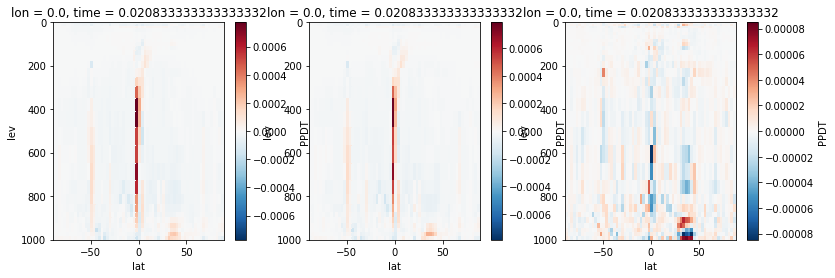

In [229]:
comp(lambda d: d.isel(time=1, lon=0), 'PPDT', yincrease=False)

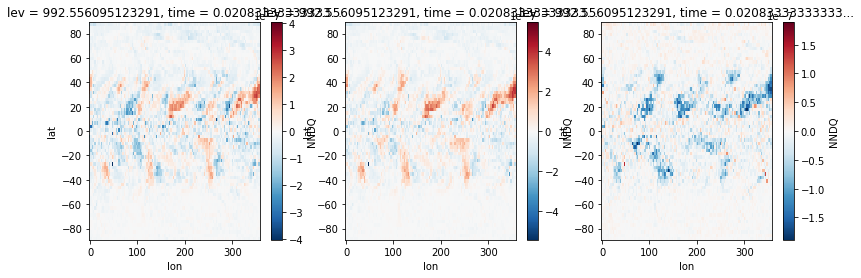

In [230]:
comp(lambda d: d.isel(time=1, lev=-1), 'NNDQ', cmap='RdBu_r')

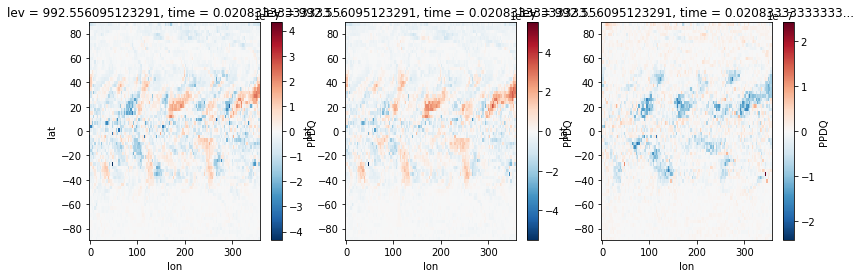

In [231]:
comp(lambda d: d.isel(time=1, lev=-1), 'PPDQ', cmap='RdBu_r')

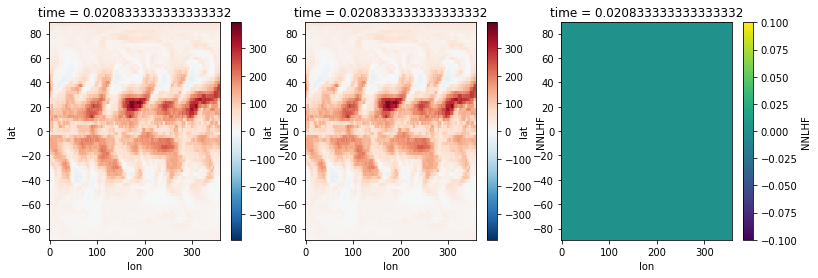

In [233]:
comp(lambda d: d.isel(time=1), 'NNLHF')

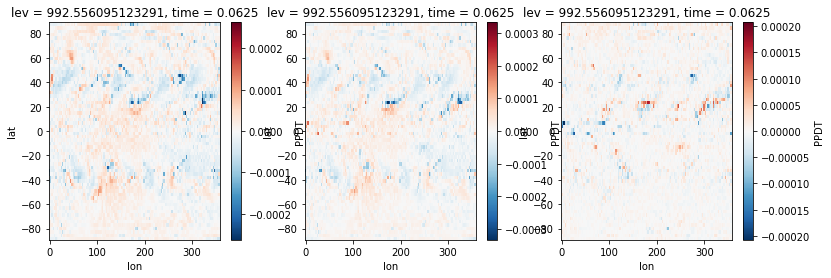

In [242]:
comp(lambda d: d.isel(time=3, lev=-1), 'PPDT', cmap='RdBu_r')

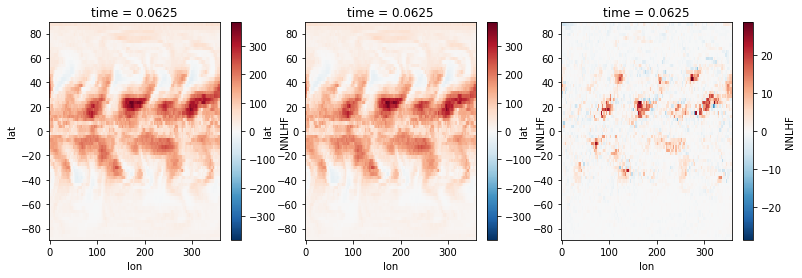

In [244]:
comp(lambda d: d.isel(time=3), 'NNLHF')